# Student University Complaints Analysis

I wanted to see what university students complained about the most. To do this I used student complaints and analyzed them in order to see what words are most common. After visualizing the data in a word cloud I will separate the data based on the type of student complaint to see if that will provide more information on why students are complaining. I will also see if there are any trends between the GPA of the student filing the complaint and the amount of complaints that other students with the same GPA made. I predict that categories related to academics and learning will have a lot of words related to course work like "professor", "support", "student", "assignments", or "hard", while categories that are related to finance and money will have words like "afford", "pay", "struggle", and "university".

##The Dataset

https://www.kaggle.com/datasets/omarsobhy14/university-students-complaints-and-reports?resource=download data set that was used


##Uploading the data and reading it

In [2]:
import pandas as pd #uploading data
import numpy as np

complain_data = pd.read_csv('uni complaints.csv')
complain_df = pd.DataFrame(complain_data)
complain_df

,Genre,Reports,Age,Gpa,Year,Count,Gender,Nationality
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,1,M,Egypt
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,1,F,Egypt
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,1,F,Egypt
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,1,F,Egypt
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,1,F,Egypt
...,...,...,...,...,...,...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...,18,1.16,4,1,M,Indonesia
1001,Food and Cantines,27. I have been unable to find food that I can...,20,4.05,2,1,M,Indonesia
1002,Food and Cantines,28. I have been unable to find food that I enjoy.,22,1.86,3,1,M,Indonesia
1003,Food and Cantines,29. I have been unable to find food that is he...,20,2.06,2,1,M,Indonesia


##Cleaning the Data and getting rid of common words

In [3]:
#Cleaning data
stopwords = ['i', 'a', 'an', 'and', 'the', 'on', 'of', 'in','am', 'with', 'that', 'you', 'just', 'me', 'to', 'at', 'were','for', 'im', 'its', 'is', 'it', 'but', 'my', 'more', 'be', 'like', 'or', 'have', 'are', 'there', 'can', 'ive', 'get', 'we', 'about', 'so', 'this', 'who', 'when','as']

complain_df = complain_df.drop('Nationality', axis = 1).drop('Count', axis = 1)
complain_df

complain_df['Reports'] = complain_df['Reports'].str.strip().str.lower().str.replace('\d+', '', regex = True).str.replace('.','').str.replace("'", "").str.replace('"','')
complain_df

complain_df['Reports'] = complain_df['Reports'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))
complain_df

,Genre,Reports,Age,Gpa,Year,Gender
0,Academic Support and Resources,limited access research databases materials ca...,27,2.18,2,M
1,Academic Support and Resources,having trouble finding course materials need c...,23,3.11,2,F
2,Academic Support and Resources,frustrating limited access research databases ...,20,3.68,2,F
3,Academic Support and Resources,really struggling one classes cant appointment...,20,1.30,2,F
4,Academic Support and Resources,really struggling understanding instructions a...,26,2.50,2,F
...,...,...,...,...,...,...
1000,Food and Cantines,been unable find food meets dietary needs,18,1.16,4,M
1001,Food and Cantines,been unable find food afford,20,4.05,2,M
1002,Food and Cantines,been unable find food enjoy,22,1.86,3,M
1003,Food and Cantines,been unable find food healthy nutritious,20,2.06,2,M


After reading the data I removed the count and nationality columns because they were not necessary to the data I was analyzing. It is also important to clean the data by getting rid of numbers and punctuation. I also got rid of words that might be very common and skew the data. For example the word "I" appears a lot in the dataset, however people are not complaining about themselves they are say statements like "I need...", "I feel like... ", or " I think..."

##Seeing which words show up the most in complaints

In [ ]:
from collections import Counter #word frequencies
reports = ' '.join(complain_df['Reports'])
common_complaint = Counter(reports.split())
most_common_complaints = common_complaint.most_common(100)
most_common_complaints

After cleaning the data I can see which words are most frequently used and how many times each of these words is found by setting up a counter. This will then help me make a visualization and make it easier to see the most common words that are said in complaints.

##Making a Wordcloud to show which words are most commonly used in complaints

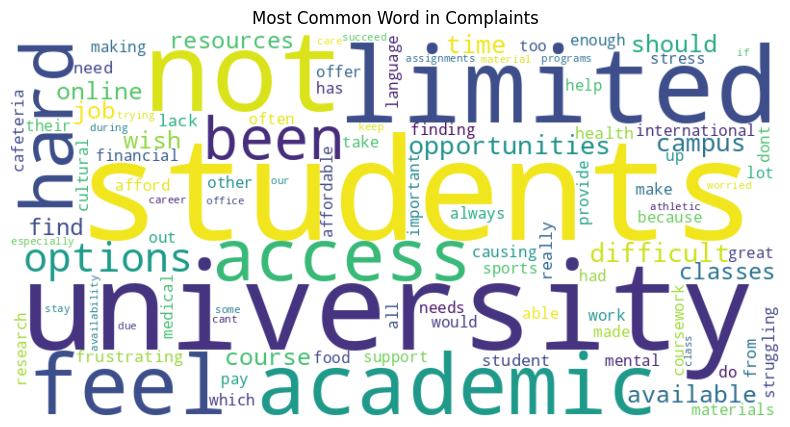

In [61]:
import matplotlib.pyplot as plt #making wordcloud with most common words
from wordcloud import WordCloud

common_dict = dict(most_common_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word in Complaints')
plt.show()

By making this word cloud it is easier to see what people complain about most because the words said more frequently are bigger. It seems like some of the most common words shown are students, university, not, limited, and access. While this gives us an insight into what one of the root problems of complaints could be, it's not very specific and each term could mean a number of different things in a different context.

##Seperating the Data Frame into different data frames based on the genre of complaint

In [ ]:
#seperating different genres of complaints
slices = [(0, 236), (236, 321), (321, 410), (410, 501), (501, 554), (554, 640), (640, 730), (730, 763),(763, 827), (827, 867), (867, 1004) ]

dfs = [complain_df.iloc[start:end] for start, end in slices]

for i, complain_df_split in enumerate(dfs):
    print(f"DataFrame {i+1}:")
    print(complain_df_split)

By making different dataframes based on the type of genre of complaint that was filed we can get more of an insight into what the main problems seem to be. I then repeated the same process as before and found the most frequent words used and plotted them in a word cloud.

##Making Wordclouds for individual genres

###Academic Support and Resources Complaints Wordcloud

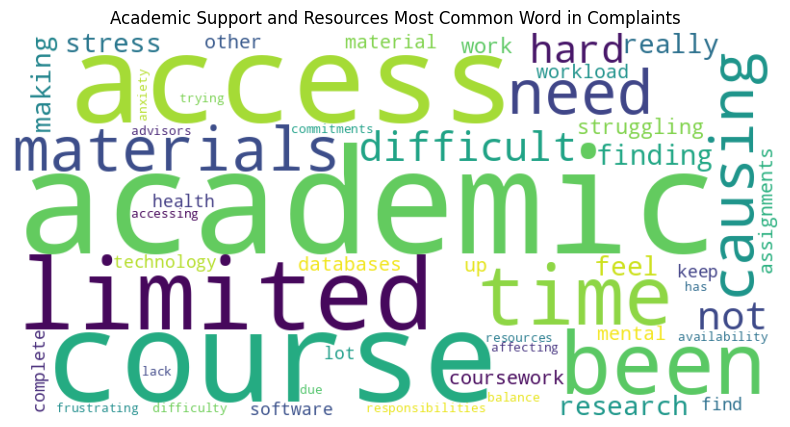

In [31]:
#creating word clouds of most frequent words for each genre
#academic support and resources
academic_support = ' '.join(dfs[0]['Reports'])
academic_complaint = Counter(academic_support.split())
most_common_academic_complaints = academic_complaint.most_common(50)
most_common_academic_complaints

common_dict = dict(most_common_academic_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Academic Support and Resources Most Common Word in Complaints')
plt.show()

Breaking up the original data frame gives more insight because now it's easier to tell that students are struggling because of access to resources or that classes may be too difficult.

###Athletics and Sports Complaints Wordcloud

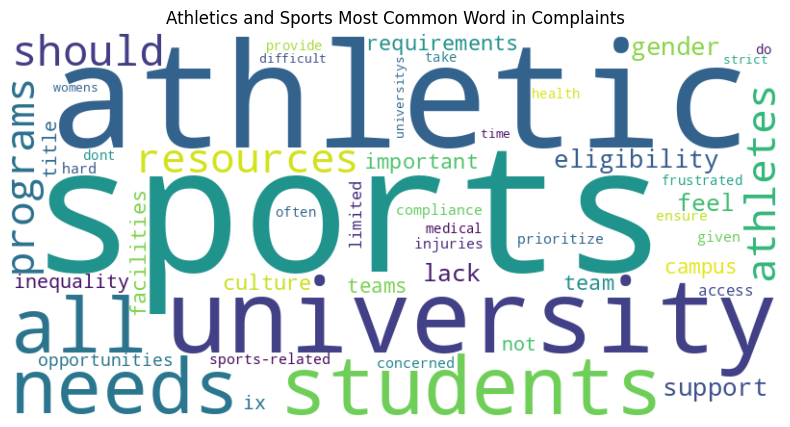

In [32]:
#Athletics and Sports
athletics = ' '.join(dfs[1]['Reports'])
athletics_complaint = Counter(athletics.split())
most_common_athletics_complaints = athletics_complaint.most_common(50)
most_common_athletics_complaints

common_dict = dict(most_common_athletics_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Athletics and Sports Most Common Word in Complaints')
plt.show()

Here we can tell that students are struggling because of the university (whether there is a lack of support or materials), other students, because their needs aren't being met.

### Career Opportunities Complaints Wordcloud

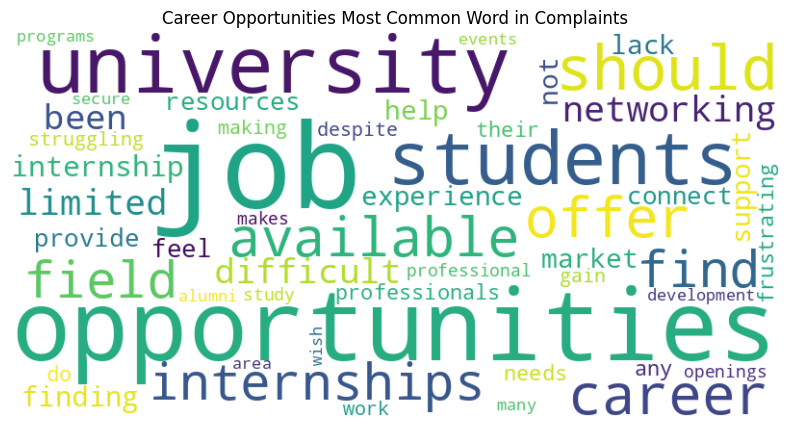

In [33]:
#Career opportunities
career_opp = ' '.join(dfs[2]['Reports'])
career_opp_complaint = Counter(career_opp.split())
most_common_career_complaints = career_opp_complaint.most_common(50)
most_common_career_complaints

common_dict = dict(most_common_career_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Career Opportunities Most Common Word in Complaints')
plt.show()

Students are struggling with finding opportunities or jobs that are available and want more support from the university.

###Financial Support Complaints Wordcloud

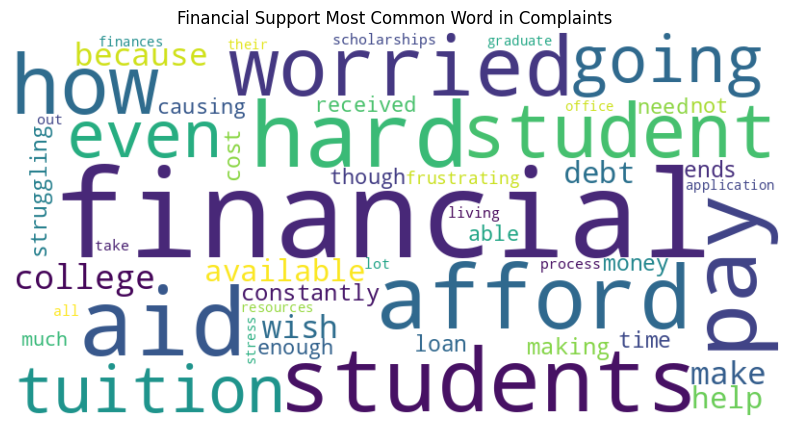

In [34]:
#Financial Support
finance = ' '.join(dfs[3]['Reports'])
financial_complaint = Counter(finance.split())
most_common_financial_complaints = financial_complaint.most_common(50)
most_common_financial_complaints

common_dict = dict(most_common_financial_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Financial Support Most Common Word in Complaints')
plt.show()

Here it is clear that a lot of students are worried about their financial situation and being able to pay the university tuition.

###Health and Well-being Support Complaints Wordcloud

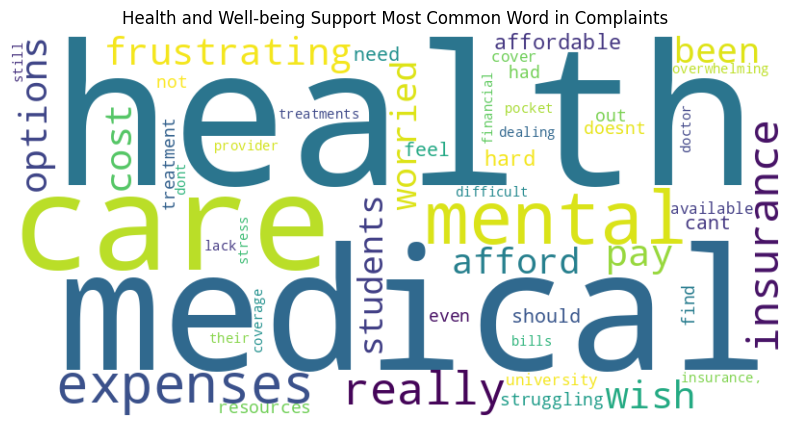

In [35]:
#Health and Well-being Support
health = ' '.join(dfs[4]['Reports'])
health_complaint = Counter(health.split())
most_common_health_complaints = health_complaint.most_common(50)
most_common_health_complaints

common_dict = dict(most_common_health_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Health and Well-being Support Most Common Word in Complaints')
plt.show()

Students are frustrated whether it's because of the lack of resources related to health and wellness or because of the expenses.

###International Student Experiences Complaints Wordcloud

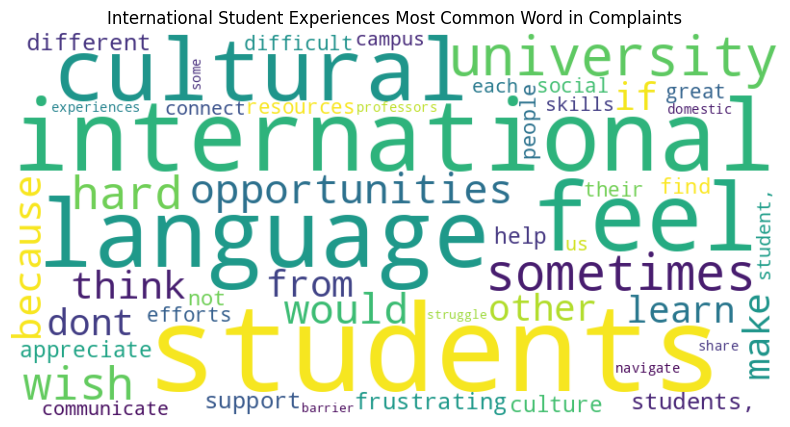

In [36]:
#International student experiences
int_student = ' '.join(dfs[5]['Reports'])
int_student_complaint = Counter(int_student.split())
most_common_int_student_complaints = int_student_complaint.most_common(50)
most_common_int_student_complaints

common_dict = dict(most_common_int_student_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('International Student Experiences Most Common Word in Complaints')
plt.show()

Students want more opportunities to learn languages and other cultures and are also frustrated with the amount of support they're receiving.

###Online Learning Complaints Wordcloud

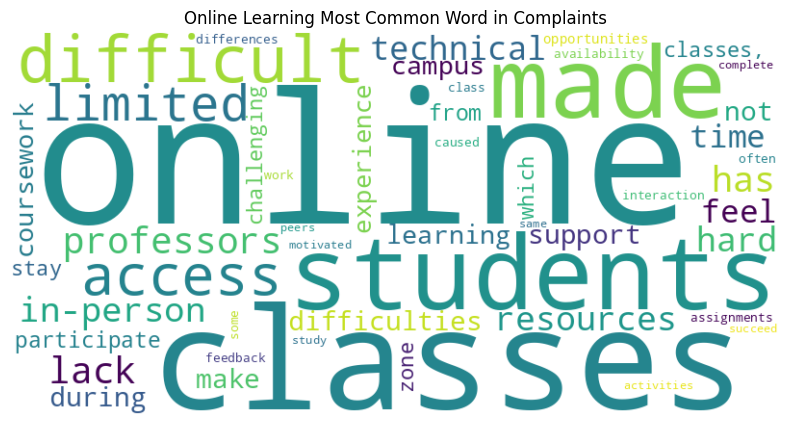

In [37]:
#Online Learning
online = ' '.join(dfs[6]['Reports'])
online_complaint = Counter(online.split())
most_common_online_complaints = online_complaint.most_common(50)
most_common_online_complaints

common_dict = dict(most_common_online_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Online Learning Most Common Word in Complaints')
plt.show()

There are a lot of technical difficulties present in online classes as well a limited resources making the classes more challenging and students feel like there is limited support

###Student Affairs Complaints Wordcloud

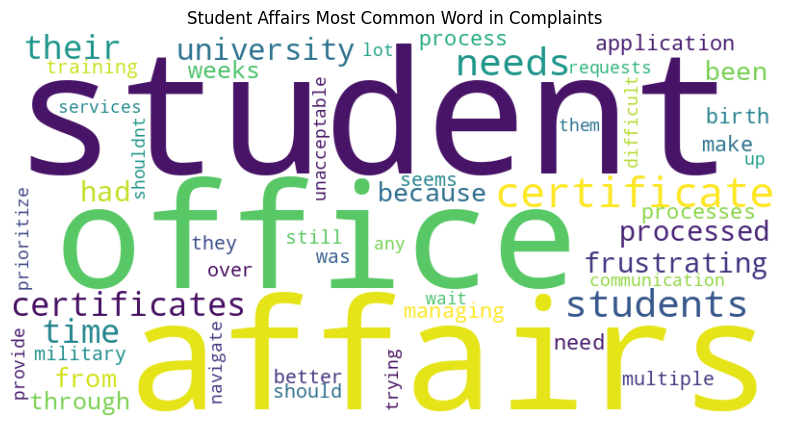

In [38]:
#Student Affairs
student = ' '.join(dfs[7]['Reports'])
student_complaint = Counter(student.split())
most_common_student_complaints = student_complaint.most_common(50)
most_common_student_complaints

common_dict = dict(most_common_student_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Student Affairs Most Common Word in Complaints')
plt.show()

The most common words seem to be student affairs office, so students are  not pleased with the way the student affairs office functions and the help it gives to students.

###Housing and Transportation Complaints Wordcloud

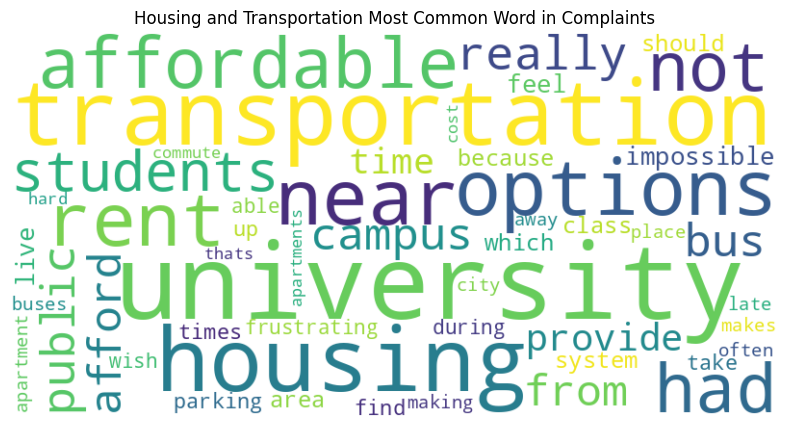

In [39]:
#Housing and Transportation
housing = ' '.join(dfs[8]['Reports'])
housing_complaint = Counter(housing.split())
most_common_housing_complaints = housing_complaint.most_common(50)
most_common_housing_complaints

common_dict = dict(most_common_housing_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Housing and Transportation Most Common Word in Complaints')
plt.show()

People are worried about getting to and from classes as well as being able to afford a place to stay.

###Activities and Traveling Complaints Wordcloud

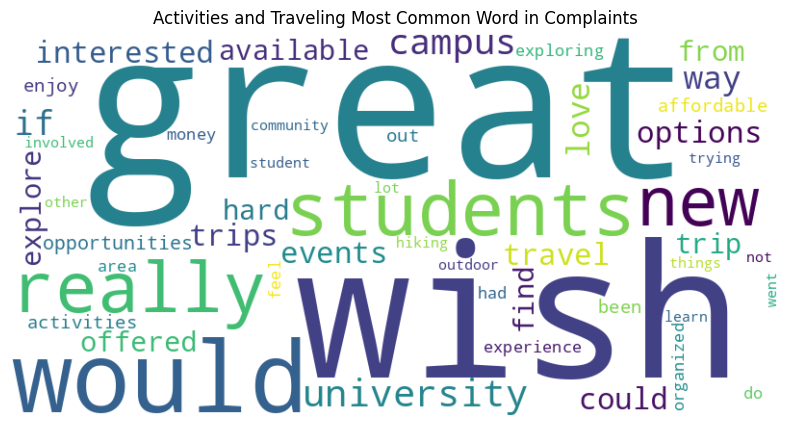

In [40]:
#Activities and Traveling
activities = ' '.join(dfs[9]['Reports'])
activities_complaint = Counter(activities.split())
most_common_activities_complaints = activities_complaint.most_common(50)
most_common_activities_complaints

common_dict = dict(most_common_activities_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Activities and Traveling Most Common Word in Complaints')
plt.show()

Students want the university to provide more opportunities for activities.

###Food and Cantines Complaints Wordcloud

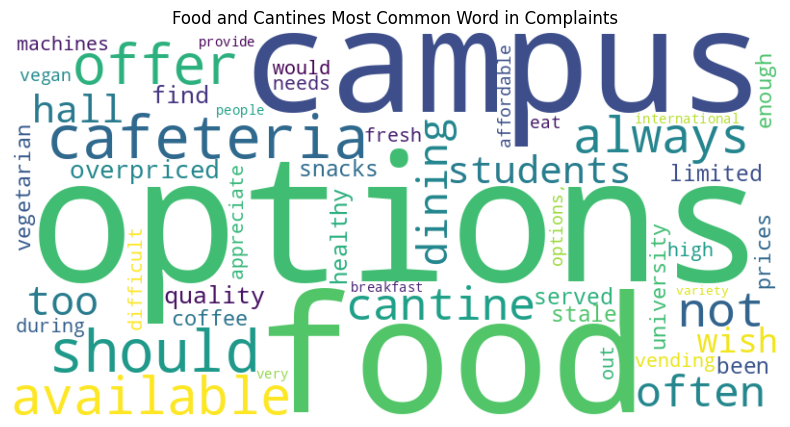

In [41]:
#Food and Cantines
food = ' '.join(dfs[10]['Reports'])
food_complaint = Counter(food.split())
most_common_food_complaints = food_complaint.most_common(50)
most_common_food_complaints

common_dict = dict(most_common_food_complaints)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(common_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Food and Cantines Most Common Word in Complaints')
plt.show()

Students want better food and more food options on campus.

##GPA vs complaints

I wanted to see if people with a lower GPA would file more complaints than people with a higher GPA or if GPA had any impact on complaints at all.

###Academic Support and Resourses Complaint vs GPA

Text(0, 0.5, 'Amount of People')

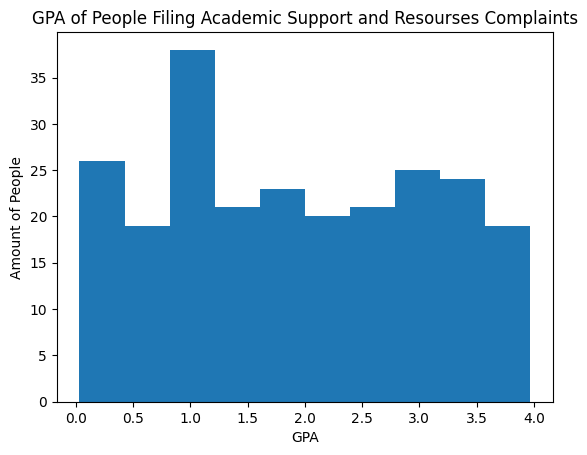

In [42]:
academic_gpa = dfs[0]['Gpa']

plt.hist(academic_gpa)
plt.title('GPA of People Filing Academic Support and Resourses Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

Although there is a spike at the 1.0 GPA it seems like most complaints related to academics came from a wide variety of GPAs and people with lower GPAs are not more likley to complain than people with higher GPAs.

###Athletics and Sports Complaints vs GPA

Text(0, 0.5, 'Amount of People')

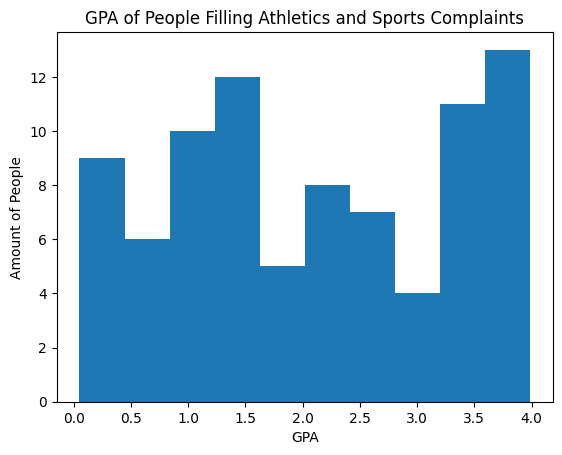

In [43]:
athletic_gpa = dfs[1]['Gpa']

plt.hist(athletic_gpa)
plt.title('GPA of People Filling Athletics and Sports Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

For athletic related complaints it seems like people with an average GPA (2.0 to 3.0) complain less about athletics and sports while people with extreme GPAs (0.0 to 1.0 and 3.5 to 4.0) complain more.

###Career Oppurtunities Complaints vs GPA

Text(0, 0.5, 'Amount of People')

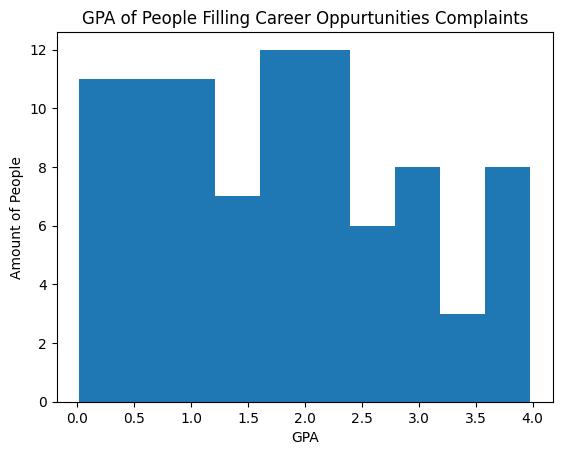

In [44]:
career_gpa = dfs[2]['Gpa']

plt.hist(career_gpa)
plt.title('GPA of People Filling Career Oppurtunities Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

It seems like people with lower GPAs file more complaints related to career opportunities than people with higher GPAs.

###Financial Support Complaints vs GPA

Text(0, 0.5, 'Amount of People')

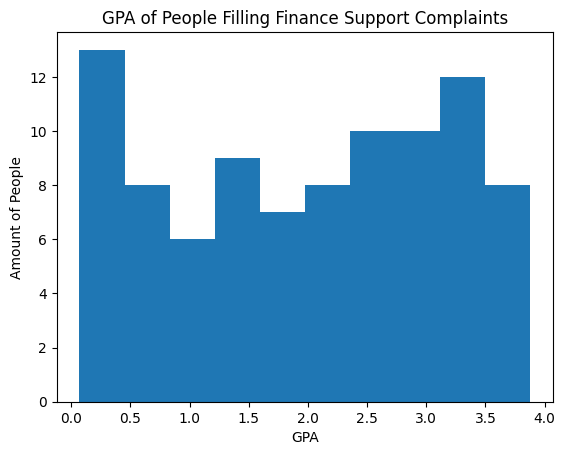

In [45]:
finance_gpa = dfs[3]['Gpa']

plt.hist(finance_gpa)
plt.title('GPA of People Filling Finance Support Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

The people most likely to file complaints related to finance are people with low GPAs or high GPAs. Although there are still a lot of people who have all different GPA levels filling financial complaints.

###Health and Well-being Support Complaints vs GPA

Text(0, 0.5, 'Amount of People')

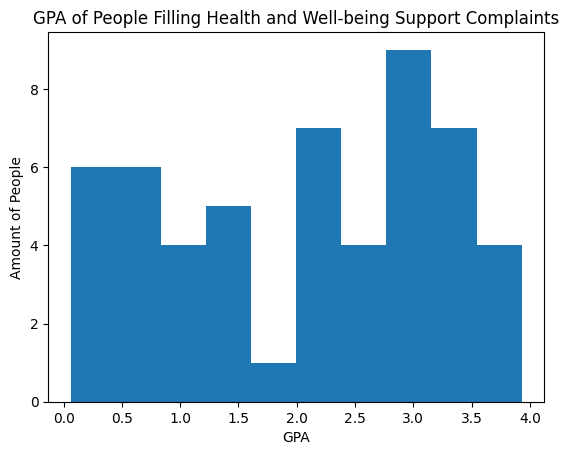

In [46]:
health_gpa = dfs[4]['Gpa']

plt.hist(health_gpa)
plt.title('GPA of People Filling Health and Well-being Support Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

People with average GPAs file significantly less health related complains that people with higher GPAs.

###International Student Experiences Complaints vs GPA

Text(0, 0.5, 'Amount of People')

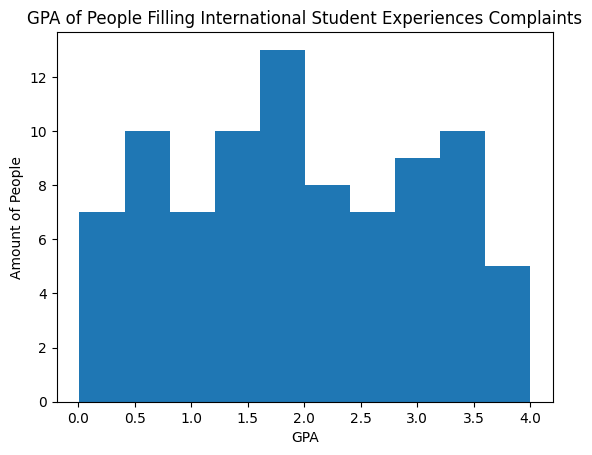

In [47]:
int_student_gpa = dfs[5]['Gpa']

plt.hist(int_student_gpa)
plt.title('GPA of People Filling International Student Experiences Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

There is a big variety of people with different GPAs filing complaints related to international student experiences.

###Online Learning Complaints vs GPA

Text(0, 0.5, 'Amount of People')

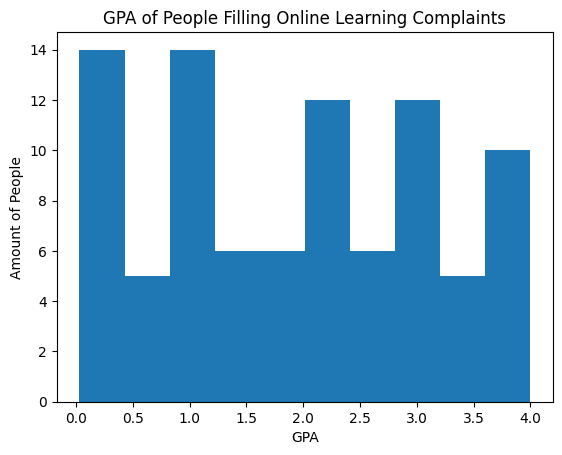

In [48]:
online_gpa = dfs[6]['Gpa']

plt.hist(online_gpa)
plt.title('GPA of People Filling Online Learning Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

Although people with all kinds of GPAs file complaints due to online learning there is a very big spike of people who file complaints who have GPAs between 0.0 and .05 and 1.0 and 1.5.

### Student Affairs Complaints vs GPA

Text(0, 0.5, 'Amount of People')

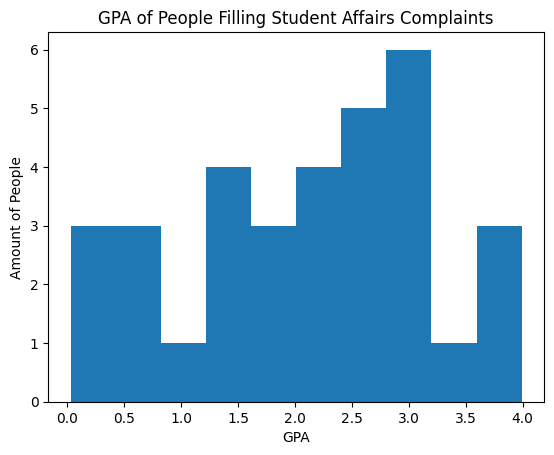

In [52]:
affairs_gpa = dfs[7]['Gpa']

plt.hist(affairs_gpa)
plt.title('GPA of People Filling Student Affairs Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

There is an increase of people filing student affairs complaints as GPA increases, but people with a GPA higher than a 3.0 are less likely to file complaints.

###Housing and Transportation Complaints vs GPA

Text(0, 0.5, 'Amount of People')

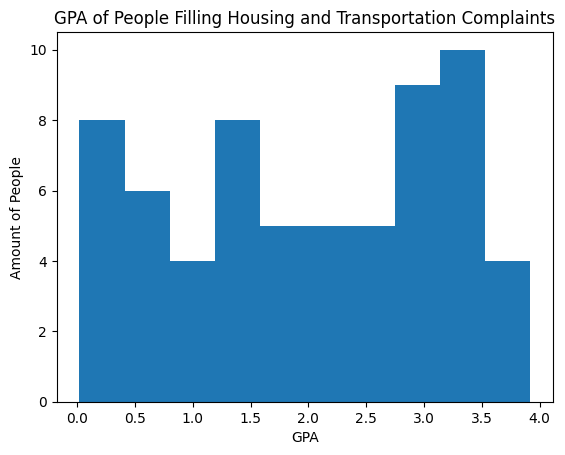

In [53]:
housing_gpa = dfs[8]['Gpa']

plt.hist(housing_gpa)
plt.title('GPA of People Filling Housing and Transportation Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

It seems like people of all different types of GPAs file complaints due to housing and transportation, but people with GPAs between 0.5 and 1.0 and 3.5 and 4.0 are less likely to file a complaint.

###Activities and Traveling Complaints vs GPA

Text(0, 0.5, 'Amount of People')

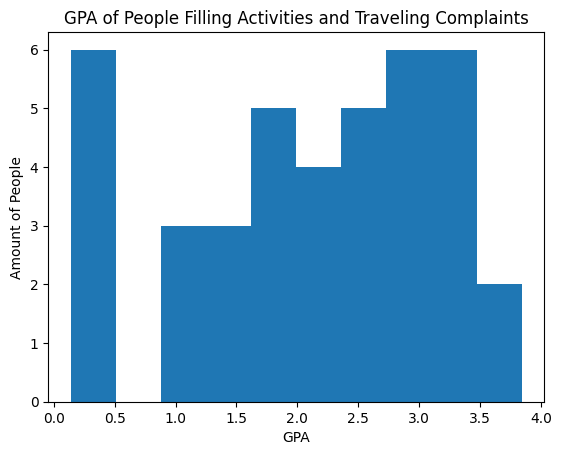

In [59]:
activities_gpa = dfs[9]['Gpa']

plt.hist(activities_gpa)
plt.title('GPA of People Filling Activities and Traveling Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

People with GPAs between 0.0 and 0.5 and 2.5 and 3.5 are the most likely to file a complaint related to activities and traveling.

###Food and Cantines Complaints vs GPA

Text(0, 0.5, 'Amount of People')

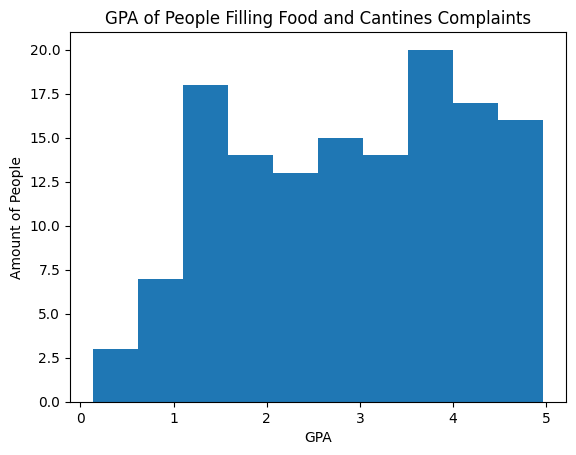

In [58]:
food_gpa = dfs[10]['Gpa']

plt.hist(food_gpa)
plt.title('GPA of People Filling Food and Cantines Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

The higher a person's GPA is the more likely they are to file a complaint about food.

###Complaints vs GPA

Text(0, 0.5, 'Amount of People')

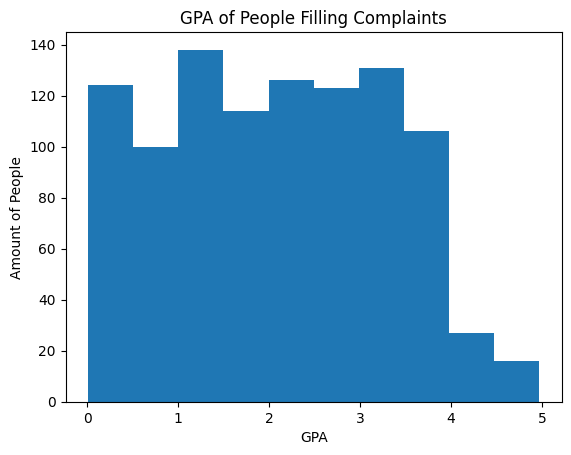

In [60]:
total_gpa = complain_df['Gpa']

plt.hist(total_gpa)
plt.title('GPA of People Filling Complaints')
plt.xlabel('GPA')
plt.ylabel('Amount of People')

GPA values are unrelated to if people would file a complaint, but people with different GPAs file complaints to different categories.

##Conclusion


Although at first it was unclear what people complained about after splitting up the data, the reason of why students complained became more clear. Additionally, while looking at all the complaints it seemed like everyone regardless of GPA filed a complaint, but after taking a closer look it became clear that people with different GPAs file different complaints.
